In [1]:
using CairoMakie
using Printf
using JLD2
using FourierFlows
include("AnalysisUtils.jl")

mapfilter_snapshots (generic function with 1 method)

In [6]:
run_directory = "/scratch/nad9961/swqg/64958835/1"
t, x, k, u = load_snapshot(run_directory, 20000)

(24248.096f0, Float32[322.3972 -3195.4912; 195.53397 -2181.0032; … ; -256.64005 45.347954; -403.19357 275.70105], Float32[3.7377236 0.44996375; 2.4721642 1.5645305; … ; -0.79811907 2.5754573; 2.1656623 -1.4074547], Float32[0.00044924626 -0.00035770502; -0.07826968 -0.07997215; … ; 0.01945857 -0.010778448; -0.01108089 0.01915084])

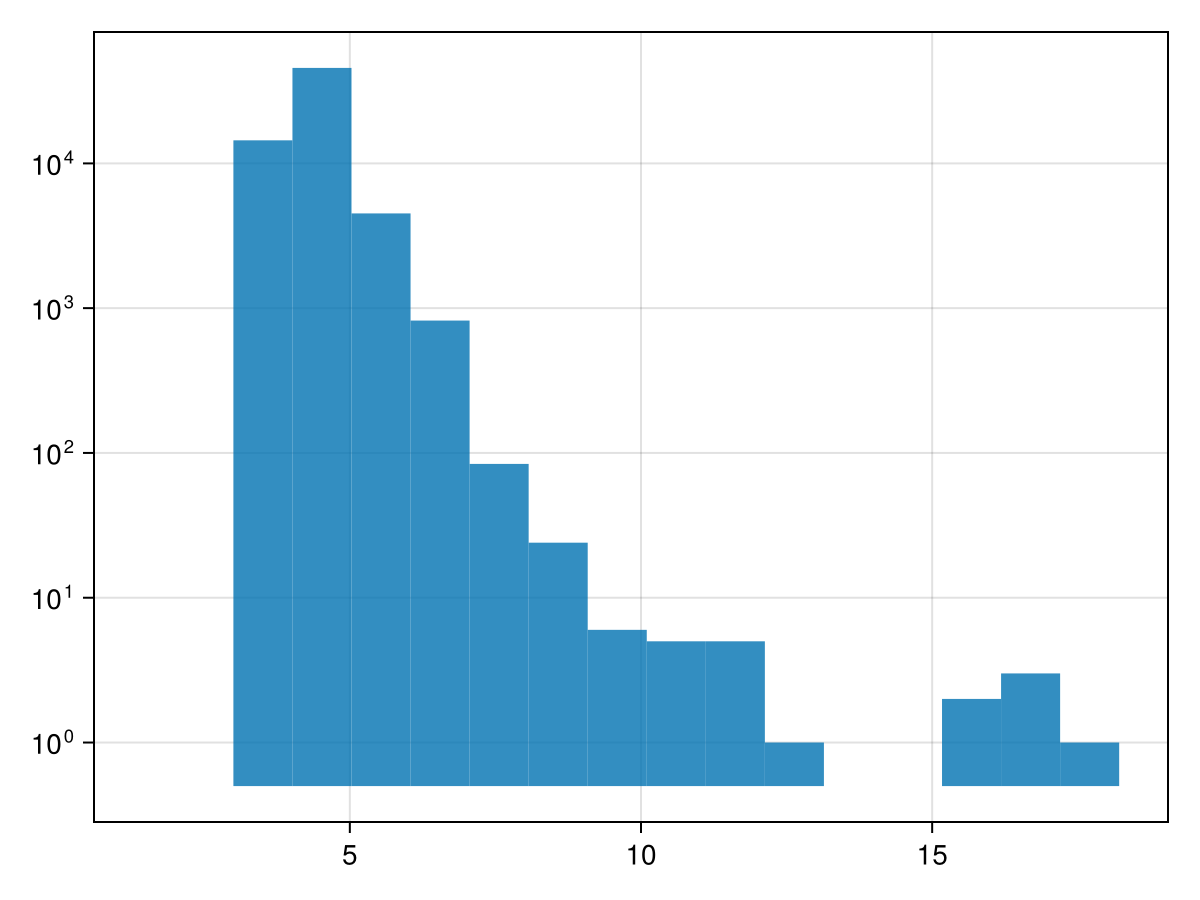

In [40]:
f0 = 3
Cg = 1
k0 = 3
K2 = sum(k.^2, dims=2)[:]
ω = @. sqrt(f0^2 + Cg^2*K2)
ω0 = sqrt(f0^2 + Cg^2*k0^2)


fig = Figure()
ax = Axis(fig[1,1]; yscale=log10)
hist!(ax, ω)
lines!([log(ω0), log(ω0)], [0, 2e4], color=:red)
fig

In [39]:
U = sqrt.(sum(u.^2, dims=2)[:])
mean(U)

0.053980842f0

In [32]:
ω0

4.242640687119285

In [43]:
run_directory = "/scratch/nad9961/swqg/60517726/1"
Nsnapshots = count_snapshots(run_directory)
t, x, k, u = load_snapshot(run_directory, Nsnapshots)
maximum(sqrt.(sum(u.^2, dims=2)[:]))

0.37564692f0